# Analyzing the water resources availability data for Chennai

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\KIIT0001\Documents\Python with Data Analytics\Data Library\chennai_reservoir_levels.csv")
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
0,01-01-2004,3.9,0.0,268.0,0.0
1,02-01-2004,3.9,0.0,268.0,0.0
2,03-01-2004,3.9,0.0,267.0,0.0
3,04-01-2004,3.9,0.0,267.0,0.0
4,05-01-2004,3.8,0.0,267.0,0.0


In [3]:
df.tail()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM
6177,29-11-2020,2814.0,403.0,2819.0,3120.0
6178,30-11-2020,2848.0,465.0,2833.0,3120.0
6179,01-12-2020,2902.0,504.0,2841.0,3123.0
6180,02-12-2020,2873.0,547.0,2847.0,3125.0
6181,03-12-2020,2867.0,590.0,2878.0,3137.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6182 entries, 0 to 6181
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Date             6182 non-null   object 
 1   POONDI           6182 non-null   float64
 2   CHOLAVARAM       6182 non-null   float64
 3   REDHILLS         6182 non-null   float64
 4   CHEMBARAMBAKKAM  6182 non-null   float64
dtypes: float64(4), object(1)
memory usage: 241.6+ KB


In [5]:
#Converting the data type of 'Date' to the date-time format
df['Date']=pd.to_datetime(df['Date'],format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6182 entries, 0 to 6181
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             6182 non-null   datetime64[ns]
 1   POONDI           6182 non-null   float64       
 2   CHOLAVARAM       6182 non-null   float64       
 3   REDHILLS         6182 non-null   float64       
 4   CHEMBARAMBAKKAM  6182 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 241.6 KB


In [6]:
df.columns

Index(['Date', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM'], dtype='object')

## Creating a column declaring the total water availability in the 4 reservoirs every year

In [7]:
df['Year']=df['Date'].apply(lambda x:x.year)
df['Month']=df['Date'].apply(lambda x:x.month)
df['Total']=df[['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM']].sum(axis=1)
df.head()

,Date,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Year,Month,Total
0,2004-01-01,3.9,0.0,268.0,0.0,2004,1,271.9
1,2004-01-02,3.9,0.0,268.0,0.0,2004,1,271.9
2,2004-01-03,3.9,0.0,267.0,0.0,2004,1,270.9
3,2004-01-04,3.9,0.0,267.0,0.0,2004,1,270.9
4,2004-01-05,3.8,0.0,267.0,0.0,2004,1,270.8


In [8]:
df_yearmean=df[['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM','Total','Year']].groupby('Year',as_index=False).mean()
df_yearmean.head()

,Year,POONDI,CHOLAVARAM,REDHILLS,CHEMBARAMBAKKAM,Total
0,2004,77.766967,19.060109,220.899180,68.683060,386.409317
1,2005,722.680603,147.771781,1468.480712,581.345205,2920.278301
2,2006,1827.553425,484.947945,2044.356164,2075.317808,6432.175342
3,2007,1794.912329,286.391781,2356.654795,1715.126027,6153.084932
4,2008,1862.338798,545.609290,2445.161202,2196.967213,7050.076503


## Plotting a bar graph for the per year total reservoir data

Text(0.5, 1.0, 'Total reservoir data per year')

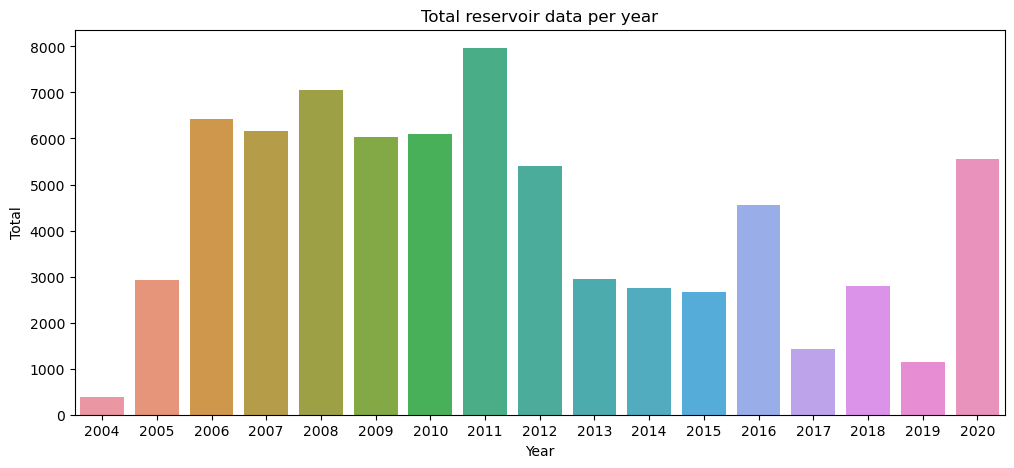

In [9]:
plt.figure(figsize=(12,5))
sns.barplot(x='Year',y='Total',data=df_yearmean)
plt.title('Total reservoir data per year')

In [10]:
df_yearmean.columns

Index(['Year', 'POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM', 'Total'], dtype='object')

## Plotting a line graph for each reservoir's resources each year

Text(0.5, 1.0, 'Data for each reservoir per year')

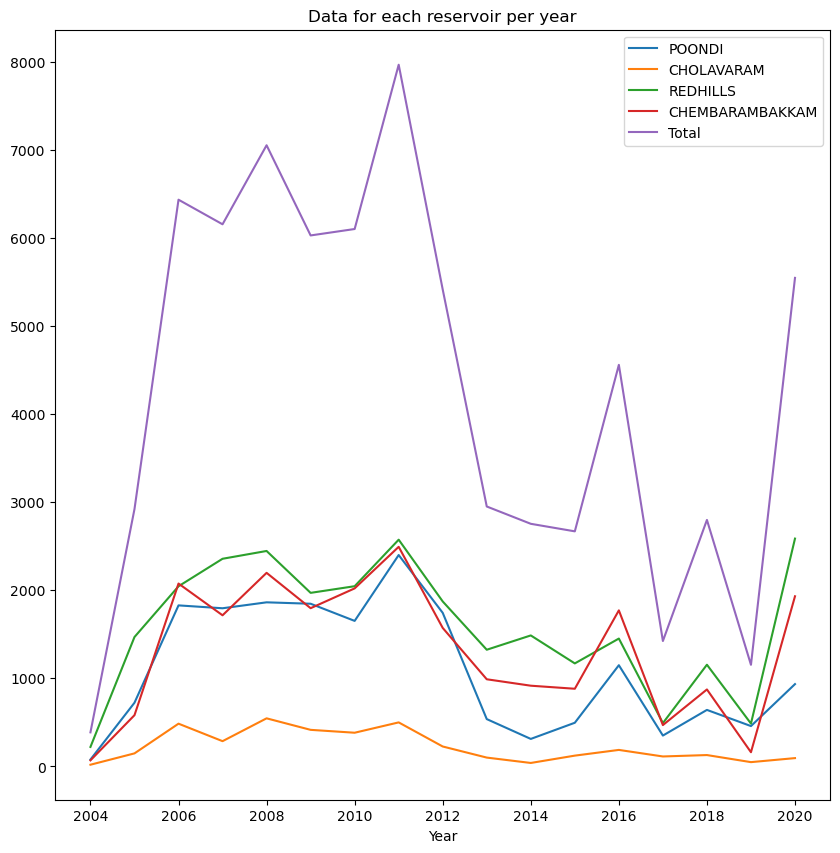

In [12]:
df_yearmean.plot(x='Year',y=['POONDI', 'CHOLAVARAM', 'REDHILLS', 'CHEMBARAMBAKKAM', 'Total'],kind="line",figsize=(10,10))
plt.title('Data for each reservoir per year')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6182 entries, 0 to 6181
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             6182 non-null   datetime64[ns]
 1   POONDI           6182 non-null   float64       
 2   CHOLAVARAM       6182 non-null   float64       
 3   REDHILLS         6182 non-null   float64       
 4   CHEMBARAMBAKKAM  6182 non-null   float64       
 5   Year             6182 non-null   int64         
 6   Month            6182 non-null   int64         
 7   Total            6182 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 386.5 KB


In [14]:
#Converting the data type of 'Month' and 'Year' to category
df['Month']=df['Month'].astype('category')
df['Year']=df['Year'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6182 entries, 0 to 6181
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Date             6182 non-null   datetime64[ns]
 1   POONDI           6182 non-null   float64       
 2   CHOLAVARAM       6182 non-null   float64       
 3   REDHILLS         6182 non-null   float64       
 4   CHEMBARAMBAKKAM  6182 non-null   float64       
 5   Year             6182 non-null   category      
 6   Month            6182 non-null   category      
 7   Total            6182 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(5)
memory usage: 303.0 KB


## Plotting a bar graph for the per month total reservoir data

<Axes: xlabel='Year', ylabel='Total'>

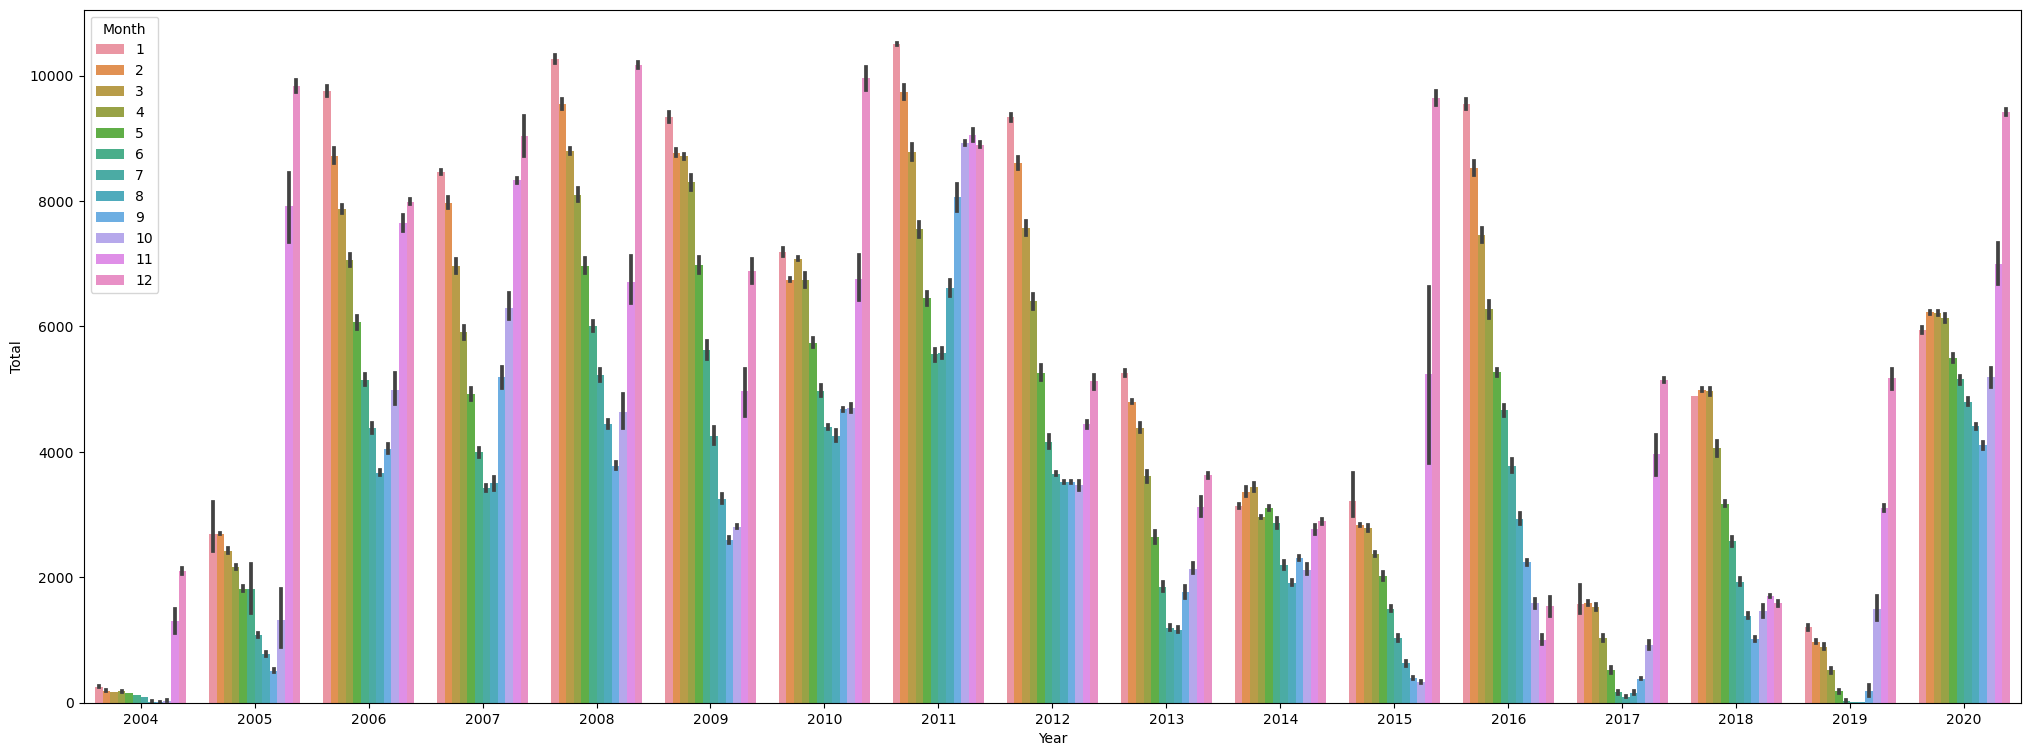

In [15]:
plt.figure(figsize=(25,9))
sns.barplot(x='Year',y='Total',hue='Month',data=df)

In [16]:
df['Month'].value_counts()

Month
1     527
3     527
5     527
7     527
8     527
10    527
4     510
6     510
9     510
11    510
12    499
2     481
Name: count, dtype: int64

## Plotting yearwise variations in total water levels in December

<Axes: xlabel='Year', ylabel='Total'>

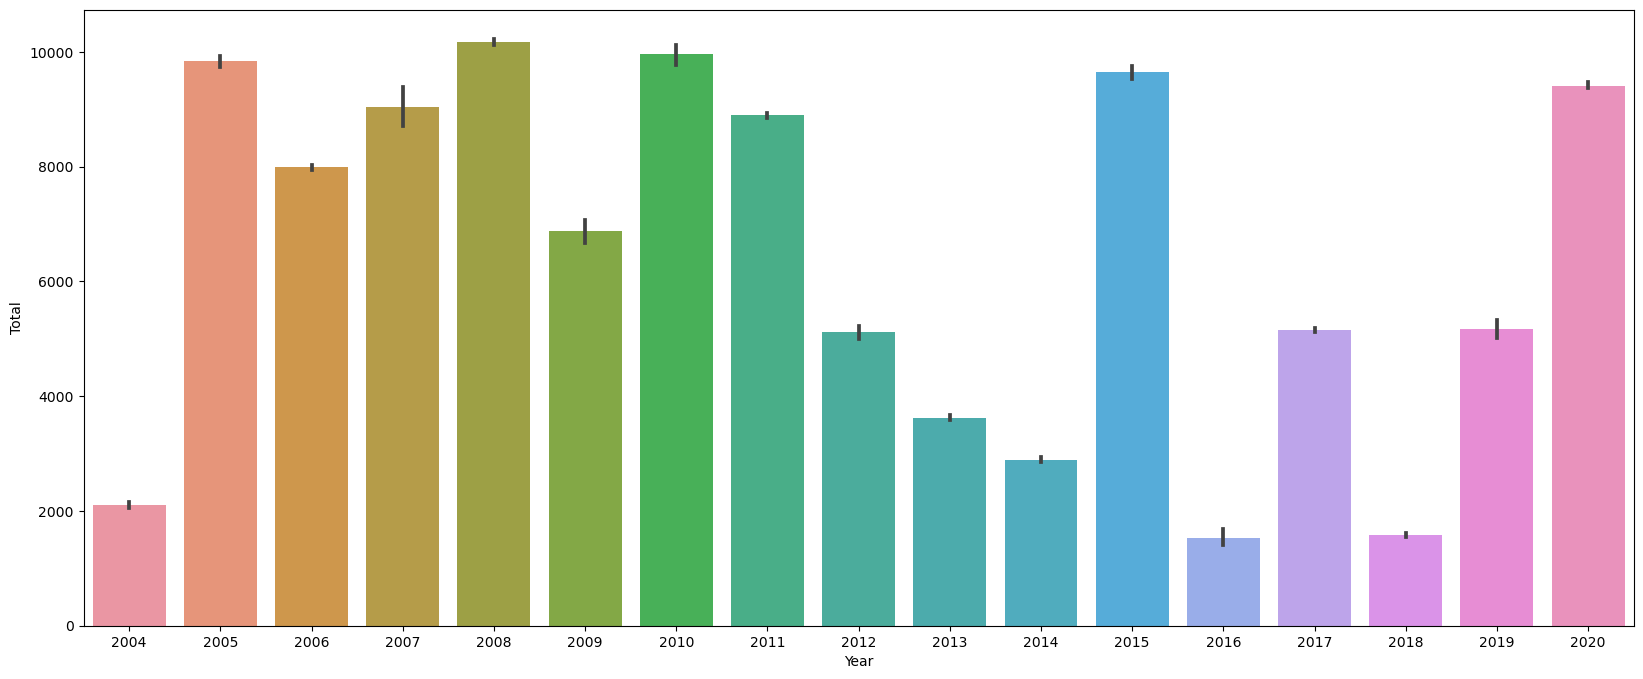

In [17]:
plt.figure(figsize=(20,8))
sns.barplot(x='Year',y='Total',data=df[df['Month']==12])

Inferences:
-The total reservoir water availability in Chennai has been substantially decreasing over the years, with the city witnessing acute water shortage in the year 2019.
-There was an abrupt rise in water levels in 2020.
-The months of June and July receive very little rainfall(due to South-West monsoon), whereas majority of rainfall occurs from October to December due to North-East monsoon.
-From 2006 to 2010, the North-East monsoon contributed a lot to the water levels.
-For the past few years, the South-West monsoon and the North-East monsoon have been contributing more or less equally to the water reservoir levels.